# XGBoost - Bike Sharing (Regression)
[ch1-gradient-boosting.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch1-gradient-boosting.ipynb)

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import time

In [4]:
import xgboost as xgb
xgb.set_config(verbosity=0)

In [5]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')

In [6]:
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [7]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.682627,1.395349,0.495423,0.474391,0.627908,0.190411,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465773,0.544894,0.183023,0.162938,0.142074,0.077462,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.522291,0.134950,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180971,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.729791,0.233206,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


In [8]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    float64
 2   yr          731 non-null    float64
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    float64
 5   weekday     731 non-null    float64
 6   workingday  731 non-null    float64
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  cnt         731 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 74.4 KB


### 누락한값이 있는지 확인

In [9]:
df_bikes.isna().sum().sum()

0

## Define Feature and Target

In [10]:
X = df_bikes.iloc[:,:-1]
y = df_bikes.iloc[:,-1]

In [11]:
pd.DataFrame(y).head()

,cnt
0,985
1,801
2,1349
3,1562
4,1600


## Regression Model Selection

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold, cross_val_score

# kfold = KFold(n_splits=5, shuffle=True, random_state=2)
# kfold = StratifiedKFold(n_splits=5)

def cross_validation(model):
    start = time.time()
    
    # scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)

    rmse = np.sqrt(-scores)
    
    print('Cross Validation:')
    print('Elased time: %0.2fs' % (time.time()-start))
    print('RMSE:', np.round(rmse, 3))
    print('Avg. RMSE: %0.3f' % (rmse.mean()))

In [13]:
cross_validation(XGBRegressor(booster='gbtree'))

Cross Validation:
Elased time: 3.29s
RMSE: [ 717.646  692.804  520.7    737.676  835.961 1006.237  991.342  747.612
  891.994 1731.128]
Avg. RMSE: 887.310


In [14]:
cross_validation(XGBRegressor(booster='gblinear'))

Cross Validation:
Elased time: 2.46s
RMSE: [8.51740585e+29 9.10722710e+29 2.27003521e+30 1.66249907e+30
 3.05144271e+30 1.06123348e+30 3.89579617e+29 2.06699933e+29
 4.62747006e+28 1.23599597e+26]
Avg. RMSE: 1045035161444651994850189639680.000


In [15]:
cross_validation(XGBRegressor(booster='dart', one_drop=1))

Cross Validation:
Elased time: 5.72s
RMSE: [ 574.362  589.35   523.466  718.081  833.296 1075.336  963.095  754.554
  843.255 1762.242]
Avg. RMSE: 863.704


In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression

cross_validation(LinearRegression())

Cross Validation:
Elased time: 0.05s
RMSE: [ 504.007  840.55  1140.882  728.392  640.197  969.949 1133.448 1252.847
 1084.636 1425.326]
Avg. RMSE: 972.023


In [17]:
from sklearn.linear_model import Lasso

cross_validation(Lasso())

Cross Validation:
Elased time: 0.08s
RMSE: [ 491.917  830.768 1133.671  731.759  632.751  963.02  1139.191 1244.107
 1065.067 1463.133]
Avg. RMSE: 969.538


In [18]:
from sklearn.linear_model import Ridge

cross_validation(Ridge())

Cross Validation:
Elased time: 0.08s
RMSE: [ 487.127  824.751 1098.441  735.696  632.238  969.021 1146.207 1226.545
 1036.396 1491.762]
Avg. RMSE: 964.818


In [19]:
from sklearn.ensemble import RandomForestRegressor

cross_validation(RandomForestRegressor())

Cross Validation:
Elased time: 2.98s
RMSE: [ 804.041  553.833  535.123  809.471  833.764  731.149  844.001  791.023
  758.921 2178.89 ]
Avg. RMSE: 884.022


## HPO

### Default

In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# define model
#model = XGBRegressor(booster='gbtree', objective='binary:logistic', 
#                        random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
model = XGBRegressor(booster='gbtree', random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)

# default model accuacry 
def getAccuracy(model):
    start = time.time()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    reg_mse = mean_squared_error(y_test, y_pred)
    reg_rmse = np.sqrt(reg_mse)

    print('Elapsed time: %0.2fs' % (time.time()-start))        
    print('RMSE: %0.3f' % (reg_rmse))

getAccuracy(model)

Elapsed time: 0.29s
RMSE: 705.114


In [21]:
# n_estimators
param = 'n_estimators'
values = [50, 100, 200, 400, 800]
best_param = 0
best_score = 1e9
cnt = 0
start = time.time()

for value in values:
    start = time.time()
    
    xgb = XGBRegressor(booster='gbtree', n_estimators=value, 
                       random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    xgb.fit(X_train, y_train)
    
    y_pred = xgb.predict(X_test)
    
    reg_mse = mean_squared_error(y_test, y_pred)
    reg_rmse = np.sqrt(reg_mse)
    
    if best_score > reg_rmse:
        best_score = reg_rmse
        best_param = cnt

    print('RMSE: %0.3f' % (reg_rmse))
    cnt = cnt + 1

print('Elapsed time: %0.2fs' % (time.time()-start))            
print('\nElased time: %0.2fs' % (time.time()-start))    
print('best score: %0.2f' % (best_score))
print('best param: ', values[best_param])

RMSE: 704.709
RMSE: 705.114
RMSE: 704.883
RMSE: 704.872
RMSE: 704.872
Elapsed time: 1.97s

Elased time: 1.97s
best score: 704.71
best param:  50


## HPO: Randomized Search

In [22]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score(=RMSE): {0:.3f}".format(
                    np.sqrt(-results["mean_test_score"][candidate]),
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [23]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20): 
    xgb = XGBRegressor(booster='gbtree', random_state=2, verbosity=0, use_label_encoder=False, n_jobs=-1)
    
    # kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)    
    # rand_reg = RandomizedSearchCV(xgb, params, cv=kfold, n_iter=runs, n_jobs=-1, random_state=2, scoring='neg_mean_squared_error')    
    rand_reg = RandomizedSearchCV(xgb, params, cv=10, n_iter=runs, n_jobs=-1, random_state=2, scoring='neg_mean_squared_error')
    
    rand_reg.fit(X_train, y_train)    
    
    best_model = rand_reg.best_estimator_    
    
    best_params = rand_reg.best_params_
    print("best parameter:", best_params)
    
    best_score = rand_reg.best_score_
    rmse = np.sqrt(-best_score)
    print("best score: {:.3f}".format(rmse))
        
    print("rand_reg.cv_results_: ", rand_reg.cv_results_)
    
    report(rand_reg.cv_results_)
    
    return best_model

In [24]:
#        'n_estimators':[50, 100, 200],
#        'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
#        'max_depth':[1, 2, 3, 5, 6, 8],
#        'gamma':[0, 0.01, 0.1, 0.5, 1, 2],
#        'min_child_weight':[1, 2, 3, 4, 5],
#        'subsample':[0.5, 0.7, 0.8, 0.9, 1],
#        'colsample_bytree':[0.5, 0.7, 0.8, 0.9, 1],  

start = time.time()

best_model = randomized_search(
    params={
        'n_estimators':[10, 50, 100, 800],
        'learning_rate':[0.1],
        'max_depth':[2],
        'subsample':[0.9],
        }, 
    runs=20)

print('\nElapsed time: %0.2fs' % (time.time()-start))

best parameter: {'subsample': 0.9, 'n_estimators': 800, 'max_depth': 2, 'learning_rate': 0.1}
best score: 627.533
rand_reg.cv_results_:  {'mean_fit_time': array([ 17.30332191,  85.96366246, 167.30137162, 871.57227056]), 'std_fit_time': array([ 0.90137398,  2.18542396,  5.81538352, 33.95184451]), 'mean_score_time': array([0.29684663, 0.2438123 , 0.26345882, 0.07734544]), 'std_score_time': array([0.10468295, 0.08261049, 0.11196867, 0.04227892]), 'param_subsample': masked_array(data=[0.9, 0.9, 0.9, 0.9],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[10, 50, 100, 800],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[2, 2, 2, 2],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.1],
             mask=[False,

In [25]:
best_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 800,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.9,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0,
 'use_label_encoder': False}

## Evaluation

In [26]:
model = best_model

def model_estimation(model):    
    start = time.time()
    
    y_pred = model.predict(X_test)

    reg_mse = mean_squared_error(y_test, y_pred)
    reg_rmse = np.sqrt(reg_mse)

    print('Elapsed time: %0.2fs' % (time.time()-start))    
    
    #print('RMSE:', np.round(rmse, 3))
    print('RMSE: %0.3f' % (reg_rmse))
    
cross_validation(model)   
model_estimation(model)    

Cross Validation:
Elased time: 17.42s
RMSE: [ 588.988  519.716  540.768  616.878  795.94   812.944  785.69   673.62
  727.272 1222.469]
Avg. RMSE: 728.428
Elapsed time: 0.01s
RMSE: 627.038


## Feature Importances

Feature Importances:
[0.16738097 0.22062384 0.         0.01791927 0.0166169  0.01444885
 0.01693209 0.24576582 0.16632618 0.07720511 0.02798684 0.02879421]
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


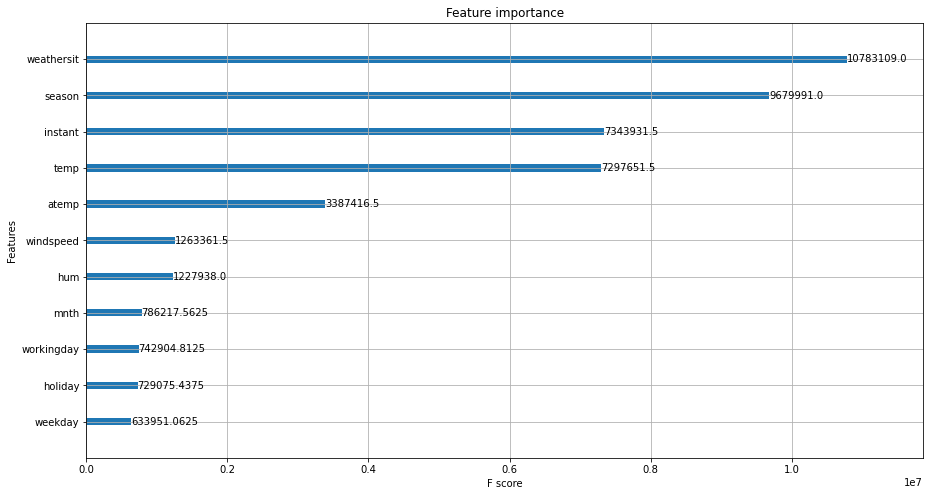

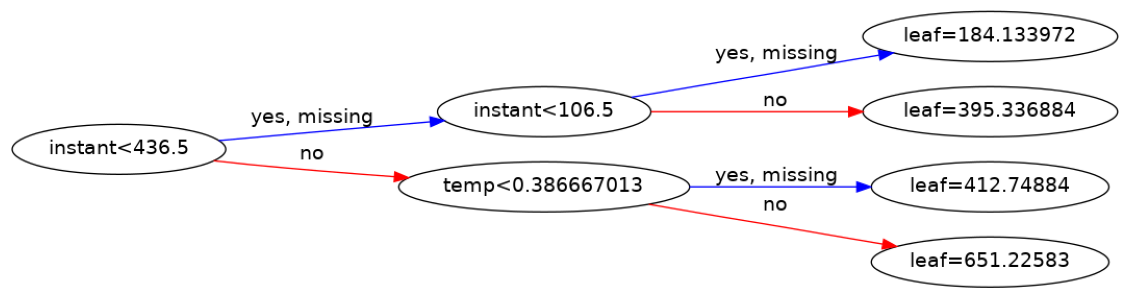

In [27]:
print('Feature Importances:')
print(model.feature_importances_)

import xgboost as xgb

feature_data = xgb.DMatrix(X_test)
model.get_booster().feature_names = feature_data.feature_names
model.get_booster().feature_types = feature_data.feature_types

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
xgb.plot_importance(model, ax=ax, importance_type='gain')

!pip install graphviz

xgb.plot_tree(model, num_trees=0, rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show()

### HPO (book recommendation)

In [28]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(max_depth=3, n_estimators=1600, eta=0.02, subsample=0.75, random_state=2)

xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)**0.5

print("RMSE: %0.2f" % (rmse))

RMSE: 584.34
